# Workshop Tutorial: Propagating Posteriors

In this tutorial we'll cover how to propagate posteriors through the forward model and to constrained parameters.

This interactive workshop tutorial covers many of the same topics as the corresponding online tutorials:

* [Advanced: Distribution Propagation](http://phoebe-project.org/docs/2.4/tutorials/distribution_propagation.ipynb)


In [1]:
import phoebe

b = phoebe.load('./data/synthetic/after_final_round.bundle')

/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:10382: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._value = np.array(value)


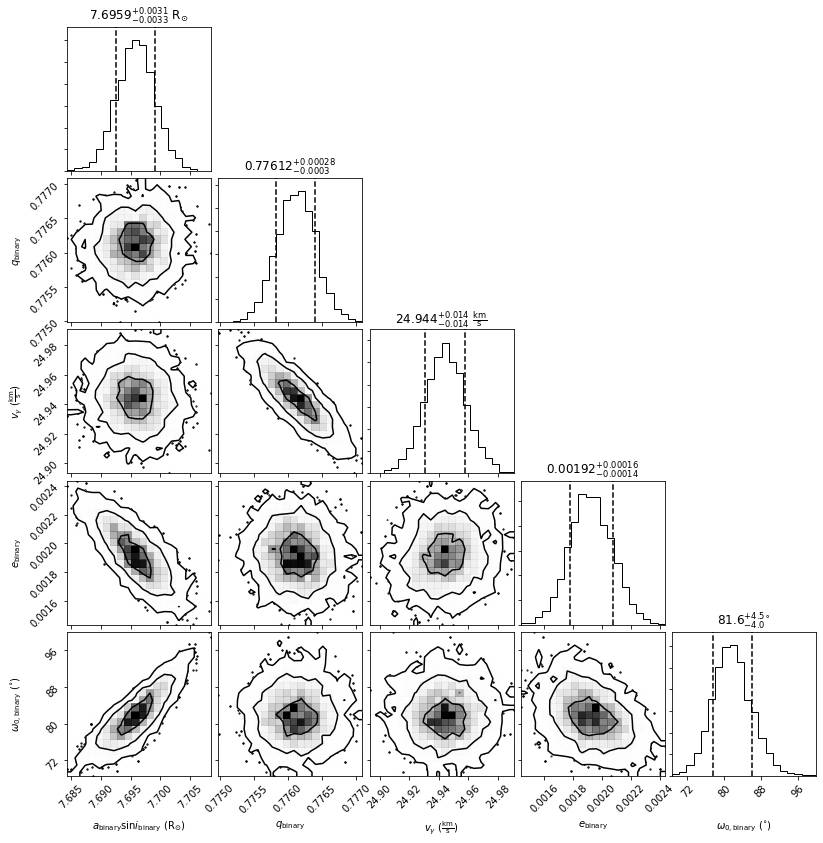

In [2]:
_ = b.plot_distribution_collection(solution='final_round', show=True)

As we saw in the [distributions tutorial](./Tutorial_19_distributions.ipynb), we can pass `parameters` to propagate this set of distributions through the constraint to any other parameter(s).  For example, to see how eccentricity and argument of periastron look in `esinw` and `ecosw` instead.

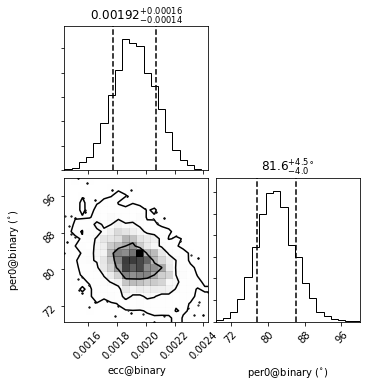

In [3]:
_ = b.plot_distribution_collection(solution='final_round', parameters=['ecc', 'per0'], show=True)

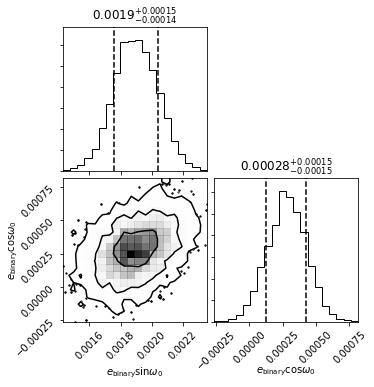

In [4]:
_ = b.plot_distribution_collection(solution='final_round', parameters=['esinw', 'ecosw'], show=True)

And we can also do the same thing as an argument to [uncertainties_from_distribution_collection](http://phoebe-project.org/docs/2.4/api/phoebe.frontend.bundle.Bundle.uncertainties_from_distribution_collection):

In [5]:
b.uncertainties_from_distribution_collection(solution='final_round', parameters=['ecc', 'per0'], tex=True)

ecc@binary = 0.00192 +0.00016 -0.00014  
 per0@binary = 81.6 +4.5 -4.0  deg

In [6]:
b.uncertainties_from_distribution_collection(solution='final_round', parameters=['esinw', 'ecosw'], tex=True)

esinw@binary = 0.0019 +0.00015 -0.00014  
 ecosw@binary = 0.00028 +0.00015 -0.00015  

As we've already seen several times, we can also sample from the posteriors to propagate through the forward model.

In [7]:
b.run_compute(compute='nm_fit', solution='final_round', sample_num=20, model='post_prop')

100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


<ParameterSet: 13 parameters | kinds: lc, rv>

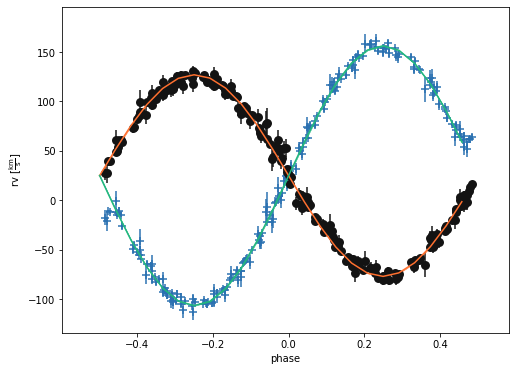

In [8]:
_ = b.plot(model='post_prop', kind='rv', x='phases', show=True)

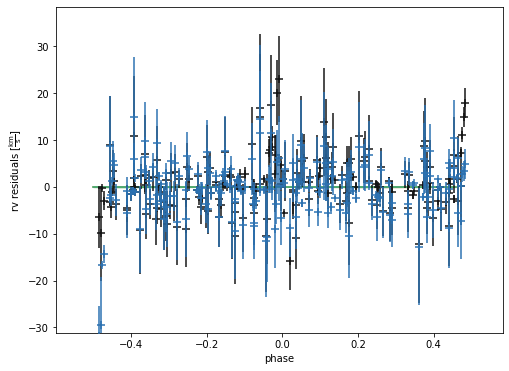

In [9]:
_ = b.plot(model='post_prop', kind='rv', x='phases', y='residuals', show=True)